/home/stoair/anaconda3/envs/math/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/stoair/anaconda3/envs/math/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33391 (\N{CJK UNIFIED IDEOGRAPH-826F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/stoair/anaconda3/envs/math/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36731 (\N{CJK UNIFIED IDEOGRAPH-8F7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/stoair/anaconda3/envs/math/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/stoair/anaconda3/envs/math/lib/python3.9/site-packages/IPython/core/pylabtools.py:152:

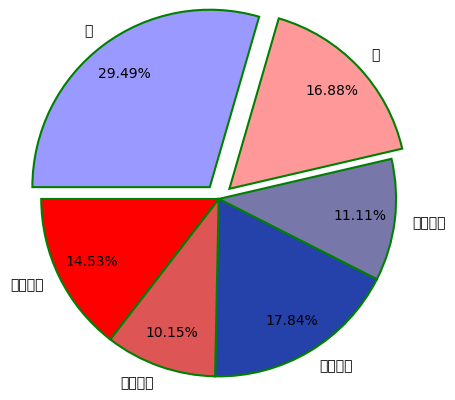

In [13]:
import time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import nonzero, array
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, normalized_mutual_info_score, rand_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

list = [[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 73, 76, 79, 83, 86, 87, 89, 90, 92, 95, 102, 103, 106, 109, 110, 112, 115, 118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 163, 166, 169, 172, 175, 178, 181, 184, 187, 188, 190, 193, 198, 199, 201, 202, 204, 207, 210, 211, 213, 214, 216, 219, 222, 225, 228, 231, 234, 235, 237, 238, 240, 243, 246, 249, 252, 254, 257, 260, 263, 264, 266, 269, 272, 275, 278, 281, 284, 287, 290, 293, 294, 296, 299, 302, 305, 308, 311, 312, 314, 315, 317, 320, 323, 326, 329, 332, 335, 336, 338, 341, 344, 347, 350, 351, 353, 354, 357, 358, 360, 363, 366, 369, 370, 372, 375, 378, 379, 381, 382, 384, 385, 387, 388, 390, 391, 393, 396, 399, 400, 402, 404, 407, 410, 411, 412, 415, 418, 420, 426, 431, 433, 436, 439, 442, 445, 448, 451, 454, 457, 460, 461, 463, 464, 469, 472, 477, 480, 483, 486, 489, 492, 498, 501, 504, 507, 510, 513, 516, 519, 525, 531, 534, 537, 540, 543, 546, 547, 549, 552, 558, 561, 564, 565, 567, 570, 573, 579, 600, 606, 609, 612, 620, 623, 626, 629, 632, 635, 644, 656, 659, 672, 675, 681, 687, 690, 696, 699, 702, 720, 725, 728, 737, 744, 747, 749, 752, 753, 755, 776, 779, 788, 791, 800, 809, 812, 815, 830, 833, 836, 848, 851, 869, 875, 881, 890, 893, 896, 899, 902, 911, 912, 914, 917, 920, 923, 926, 929, 932, 935],
        [1, 10, 28, 31, 34, 38, 43, 47, 49, 52, 53, 55, 56, 59, 62, 64, 77, 78, 84, 85, 88, 91, 93, 108, 111, 113, 114, 116, 128, 131, 132, 134, 137, 141, 143, 144, 146, 147, 156, 158, 161, 164, 165, 167, 168, 170, 171, 185, 186, 189, 191, 192, 196, 197, 200, 203, 206, 208, 212, 215, 232, 233, 236, 239, 244, 247, 253, 255, 256, 267, 270, 271, 273, 274, 291, 292, 295, 309, 313, 316, 318, 319, 327, 333, 334, 337, 348, 349, 352, 356, 359, 361, 362, 365, 367, 368, 371, 373, 374, 376, 377, 380, 383, 386, 389, 392, 394, 395, 397, 398, 401, 403, 405, 406, 408, 409, 414, 421, 437, 438, 440, 441, 443, 459, 462, 465, 467, 487, 488, 493, 505, 515, 526, 529, 548, 563, 566, 605, 622, 634, 677, 697, 727, 739, 741, 743, 751, 754, 775, 808, 829, 832, 835, 910, 913, 925, 928, 931],
        [99, 160, 423, 466, 495, 522, 550, 555, 559, 568, 576, 582, 585, 588, 590, 591, 596, 601, 603, 614, 617, 621, 630, 633, 636, 638, 641, 647, 650, 651, 653, 657, 662, 665, 673, 676, 678, 679, 684, 688, 693, 705, 708, 711, 714, 717, 718, 723, 726, 731, 738, 740, 742, 745, 750, 758, 761, 764, 767, 770, 771, 773, 774, 789, 792, 794, 797, 803, 806, 807, 818, 821, 824, 825, 827, 828, 831, 834, 839, 842, 845, 846, 849, 852, 854, 857, 860, 863, 866, 867, 870, 872, 878, 884, 887, 891, 905, 908, 909, 915, 924, 927, 930, 933],
        [2, 4, 5, 7, 8, 11, 13, 14, 16, 17, 19, 22, 23, 25, 26, 29, 32, 35, 37, 40, 41, 44, 46, 50, 58, 61, 65, 67, 68, 70, 71, 72, 74, 75, 80, 81, 82, 94, 96, 97, 98, 100, 101, 104, 105, 107, 117, 119, 120, 122, 123, 125, 126, 129, 135, 138, 140, 149, 150, 152, 153, 155, 159, 162, 173, 174, 176, 177, 179, 180, 182, 183, 194, 195, 205, 209, 217, 218, 220, 221, 223, 224, 226, 227, 229, 230, 241, 242, 245, 248, 250, 251, 258, 259, 261, 262, 265, 268, 276, 277, 279, 280, 282, 283, 285, 286, 288, 289, 297, 298, 300, 301, 303, 306, 307, 310, 321, 322, 324, 325, 328, 330, 331, 339, 340, 342, 343, 345, 346, 355, 364, 413, 416, 417, 419, 432, 435, 444, 455, 456, 468, 475, 476, 479, 482, 484, 485, 491, 496, 499, 502, 503, 506, 518, 521, 528, 535, 536, 542, 545, 595, 611, 625, 628, 701, 724, 898],
        [427, 428, 434, 553, 557, 569, 583, 584, 586, 587, 593, 597, 607, 618, 619, 631, 637, 639, 640, 642, 649, 652, 654, 658, 660, 663, 664, 667, 669, 670, 674, 680, 682, 683, 686, 689, 691, 698, 719, 734, 735, 736, 746, 748, 768, 769, 772, 777, 778, 780, 782, 785, 786, 787, 790, 793, 795, 798, 799, 801, 804, 805, 810, 811, 813, 814, 816, 817, 819, 822, 823, 826, 837, 840, 844, 847, 850, 853, 861, 865, 868, 871, 873, 876, 888, 889, 892, 894, 906, 916, 918, 919, 921, 922, 934],
        [20, 304, 422, 424, 425, 429, 430, 446, 447, 449, 450, 452, 453, 458, 470, 471, 473, 474, 478, 481, 490, 494, 497, 500, 508, 509, 511, 512, 514, 517, 520, 523, 524, 527, 530, 532, 533, 538, 539, 541, 544, 551, 554, 556, 560, 562, 571, 572, 574, 575, 577, 578, 580, 581, 589, 592, 594, 598, 599, 602, 604, 608, 610, 613, 615, 616, 624, 627, 643, 645, 646, 648, 655, 661, 666, 668, 671, 685, 692, 694, 695, 700, 703, 704, 706, 707, 709, 710, 712, 713, 715, 716, 721, 722, 729, 730, 732, 733, 756, 757, 759, 760, 762, 763, 765, 766, 781, 783, 784, 796, 802, 820, 838, 841, 843, 855, 856, 858, 859, 862, 864, 874, 877, 879, 880, 882, 883, 885, 886, 895, 897, 900, 901, 903, 904, 907]]

# plt.rcParams['axes.unicode_minus'] = False  # 坐标轴负号的处理
# plt.axes(aspect='equal')  # 将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆
# 
# length = 936
# edu = [len(list[0]) / length, len(list[1]) / length, len(list[2]) / length, len(list[3]) / length, len(list[4]) / length, len(list[5]) / length]
# labels = ['优', '良', '轻度污染', '中度污染', '重度污染', '严重污染']
# explode = [0.1, 0.1, 0, 0, 0, 0]  # 生成数据，用于凸显大专学历人群
# colors = ['#9999ff', '#ff9999', '#7777aa', '#2442aa', '#dd5555', 'red']  # 自定义颜色
# 
# plt.pie(x=edu,  # 绘图数据
#         explode=explode,  # 指定饼图某些部分的突出显示，即呈现爆炸式
#         labels=labels,  # 添加教育水平标签
#         colors=colors,
#         autopct='%.2f%%',  # 设置百分比的格式，这里保留两位小数
#         pctdistance=0.8,  # 设置百分比标签与圆心的距离
#         labeldistance=1.1,  # 设置教育水平标签与圆心的距离
#         startangle=180,  # 设置饼图的初始角度
#         radius=1.2,  # 设置饼图的半径
#         counterclock=False,  # 是否逆时针，这里设置为顺时针方向
#         wedgeprops={'linewidth': 1.5, 'edgecolor': 'green'},  # 设置饼图内外边界的属性值
#         textprops={'fontsize': 10, 'color': 'black'},  # 设置文本标签的属性值
#         )
# 
# # 添加图标题
# # 显示图形
# plt.show()

In [14]:

df = pd.read_excel('./question4.xlsx')
df1 = df.loc[list[0]]
for index, row in df1.iterrows():
        if df1
df1 = df1.iloc[:,2:]
print(df1.describe())

           CO(GT)    NMHC(GT)    C6H6(GT)     NOx(GT)     NO2(GT)         AQI
count  232.000000  268.000000  267.000000  236.000000  238.000000  274.000000
mean     1.860335  132.902217    9.246930  156.857048   93.533273   47.443480
std      1.024823   97.458229    4.972378  120.259940   36.950570   20.725294
min      0.292857    0.000000    0.740993   32.428571   30.428571   11.337030
25%      1.012500   58.488101    5.422008   73.517857   63.910714   32.132719
50%      1.528571  102.121277    8.030750  116.571429   82.464286   42.155985
75%      2.685714  204.538021   13.157390  188.625000  119.678571   62.472444
max      4.800000  502.571429   23.035989  549.800000  185.928571  103.073752


In [15]:
df2 = df.loc[list[1]]
df2 = df2.iloc[:,2:]
print(df2.describe())

           CO(GT)    NMHC(GT)    C6H6(GT)     NOx(GT)     NO2(GT)         AQI
count  131.000000  157.000000  156.000000  141.000000  141.000000  158.000000
mean     2.134587  162.370450   10.758380  170.778987  104.986018   52.855726
std      0.911753   89.082539    4.922797  122.848732   36.110306   20.711408
min      0.471429    5.718614    2.248365   26.071429   34.714286   12.955455
25%      1.392857   89.820948    6.564215   89.714286   77.142857   36.544286
50%      2.050000  157.898481    9.889116  135.000000  104.000000   51.885406
75%      2.907143  227.227062   14.623298  203.285714  127.428571   65.767747
max      4.257143  386.081943   23.883705  605.500000  202.285714  105.690000


In [16]:
df4 = df.loc[list[3]]
df4 = df4.iloc[:,2:]
print(df4.describe())

           CO(GT)    NMHC(GT)    C6H6(GT)     NOx(GT)     NO2(GT)         AQI
count  135.000000  164.000000  164.000000  139.000000  139.000000  167.000000
mean     1.978374  150.855421    9.997109  132.606269   93.942874   46.444759
std      1.003791  102.206603    4.978289   80.863003   33.680186   18.508589
min      0.242857    0.505702    1.095856   27.357143   29.428571   13.807985
25%      1.121429   65.188438    5.893066   70.821429   63.285714   31.019096
50%      1.700000  122.408902    8.886515  109.285714   95.714286   42.854286
75%      2.950000  226.724215   14.408175  181.928571  123.714286   62.023381
max      4.171429  448.571429   20.128815  501.271429  173.385714   95.980149


In [17]:
df5 = df.loc[list[4]]
df5 = df5.iloc[:,2:]
print(df5.describe())

          CO(GT)    NMHC(GT)   C6H6(GT)     NOx(GT)     NO2(GT)         AQI
count  79.000000   91.000000  91.000000   77.000000   80.000000   95.000000
mean    2.303648  153.886537  10.963418  305.889641  112.845000   61.981054
std     1.118287  114.392088   6.415338  142.599739   37.928960   25.297071
min     0.314286    1.082402   1.379670   66.857143   43.214286    8.766007
25%     1.346429   66.924724   6.013531  189.071429   85.214286   41.225217
50%     2.114286  129.233288   9.665936  308.571429  108.357143   62.235714
75%     3.278571  262.856590  17.062608  409.000000  132.964286   83.152915
max     5.078571  426.528920  26.122634  602.514286  226.571429  106.581333


In [18]:
df6 = df.loc[list[5]]
df6 = df6.iloc[:,2:]
print(df6.describe())

           CO(GT)    NMHC(GT)    C6H6(GT)     NOx(GT)     NO2(GT)         AQI
count  104.000000  127.000000  127.000000   98.000000  101.000000  135.000000
mean     2.325034  152.736816   10.884279  278.351482  110.341066   55.435943
std      1.122109  107.377458    6.041988  167.260551   40.521556   27.496547
min      0.400000    0.053900    1.301115   20.857143   12.214286    4.851865
25%      1.522143   62.446900    5.945521  118.267857   84.621429   33.746528
50%      2.139286  137.318585   10.113495  272.214286  110.571429   54.639286
75%      3.232143  246.133596   16.136912  425.125000  138.500000   80.149582
max      4.714286  402.123028   24.771654  637.000000  206.142857  104.694444
